# Linear Regression via Gradient Descent

## Generate line with noise

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
x = np.linspace(start=3, stop=10, num=100)
y = x + np.random.normal(loc=0, scale=1.5, size=100)

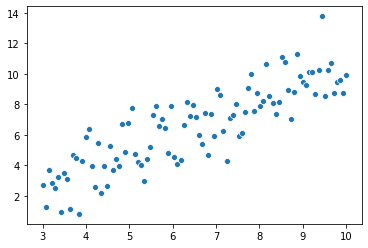

In [3]:
sns.scatterplot(x, y)

## Gradient Descent

Original Mean Squared Error(MSE) formula:  
$$MSE = \frac{1}{n} \sum \limits _{i=1} ^ {n} (y_{i} - \hat y_{i})^2$$

Substitute estimate ($\hat y_{i}$) with the equation of the regression line:  
$$f(m,c)= \frac{1}{n} \sum \limits _{i=1} ^ {n} (y_{i} - (mx_{i}+c))^2$$

### Partial derivatives:

Derivative of *f* with respect to slope (m):  
$$\frac{\partial f}{\partial m} = \frac{1}{n} \sum \limits _{i=1} ^ {n} -2 x_{i}(y_{i} - (mx_{i}+c))$$

In [4]:
D_m = lambda x, err: -2 * x.dot(err).sum() / len(x)

Derivative of *f* with respect to intercept (c):  
$$\frac{\partial f}{\partial c} = \frac{1}{n} \sum \limits _{i=1} ^ {n} -2(y_{i} - (mx_{i}+c))$$

In [5]:
D_c = lambda err: -2 * err.sum() / len(x)

In [17]:
loss = []
lr=0.005
m, c = 1, 1
epochs = 100

for i in range(epochs):
    y_hat = m*x + c
    err = y - y_hat
    
    mse = 1/len(x) * (err**2).sum()
    loss.append(mse)
    
    slope_grad = D_m(x, err)
    intercept_grad = D_c(err)
    
    m -= lr * slope_grad
    c -= lr * intercept_grad    

### Learned slope (m) and intercept (c)

In [18]:
m, c

(0.9024976032134171, 0.8351782404931613)

### Visualise loss

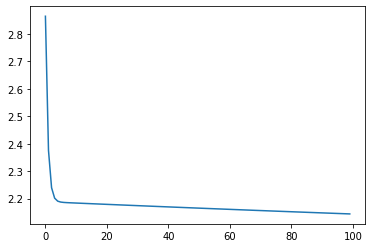

In [19]:
sns.lineplot(range(0, len(loss)), loss)

# Compare to statsmodel OLS

In [21]:
import statsmodels.api as sm

In [22]:
exog = sm.add_constant(y, prepend=False)
model = sm.OLS(x, exog)
result = model.fit()

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     272.0
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           4.99e-30
Time:                        18:42:13   Log-Likelihood:                -146.81
No. Observations:                 100   AIC:                             297.6
Df Residuals:                      98   BIC:                             302.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6515      0.040     16.493      0.000       0.573       0.730
const          2.2265      0.280      7.952      0.000       1.671       2.782
==============================================================================
Omnibus:                        5.934   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                2.903
Skew:                          -0.133   Prob(JB):                        0.234
Kurtosis:                       2.209   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualise orig and learned lines

In [33]:
learned_params = m*x+c
err = y - learned_params
mse = 1/len(x) * (err**2).sum()
display('Learned MSE: {}'.format(mse))

'Learned MSE: 2.143819286901962'

In [34]:
ols_params = result.params[0]*x+result.params[1]
err = y - ols_params
mse = 1/len(x) * (err**2).sum()
display('Statsmodel OLS MSE: {}'.format(mse))

'Statsmodel OLS MSE: 2.868420151006822'

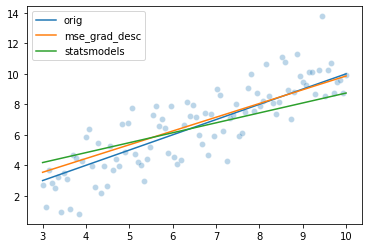

In [35]:
sns.scatterplot(x, y, alpha=0.3)

sns.lineplot(x, x, label='orig')
sns.lineplot(x, learned_params, label='mse_grad_desc')
sns.lineplot(x, ols_params, label='statsmodels')

plt.legend()
plt.show()